# Capstone Project: Tell Me a Story...#

Elyse Renouf   **|**   July 31, 2020   

Tell Me A Story (TMAS) is a content-based young children's book recommender using NLP that is derived from a Kaggle dataset of Goodreads.com book reviews. It was created so parents could input one of their child's favourite books and TMAS can recommend other similar books to read based entirely on key words in the book descriptions. 

**Please Note:** This is notebook 2 of 3 that were used to build the final product. This notebook includes all the steps I took to clean the dataset and do some initial exploratory data analysis (EDA). 

<hr>

### Cleaning & EDA ###

After all the steps completed in notebook 1 of 3, I now have a single .csv with mostly children's books and it was time to do a deeper clean and create consistency in the text, assign datatypes, manually search through and excluding all non-children's publishers (or including ONLY children's publishers, which ended up being more efficient) and then exporting that finalized .csv file for safekeeping in preparation of my Vectorizing and Modelling steps in notebook 3 of 3.   

In [1]:
#import needed packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read in the simplified kidsbooks dataset
kidsbooks = pd.read_csv('data/kidsbooks.csv', index_col=0)
kidsbooks.dtypes

index               int64
Name               object
Authors            object
ISBN               object
Rating            float64
PublishYear         int64
PublishMonth        int64
PublishDay          int64
Publisher          object
CountsOfReview      int64
pagesNumber         int64
Description        object
dtype: object

#### General DF Housekeeping:####

In [3]:
#converting rating column from float to integer to match other numerical columns - with rounding
#converting rating into integers from 1-10
kidsbooks['Rating'] = kidsbooks['Rating'].round().astype('int')

In [4]:
#resetting the letter case of all column headers to lowercase
kidsbooks.columns = kidsbooks.columns.str.lower()
#kidsbooks.head(3)

In [5]:
#drop the extra 'index' column 
kidsbooks = kidsbooks.drop(['index'], axis=1)
#kidsbooks.reset_index(inplace = True)

In [6]:
#Setting string type and lower case each of the text columns
kidsbooks['name'] = kidsbooks['name'].astype(str).str.lower()
kidsbooks['authors'] = kidsbooks['authors'].astype(str).str.lower()
kidsbooks['publisher'] = kidsbooks['publisher'].astype(str).str.lower()
kidsbooks['description'] = kidsbooks['description'].astype(str).str.lower()

#### Cleaning Steps on Publisher Column:####

In [7]:
#cleaning up multiple variations in publisher names from list above
#starting with a test (most variation in names) - publisher harper collins
kidsbooks.loc[kidsbooks['publisher'].str.contains('harper'), 'publisher'] = 'harpercollins'

In [8]:
#verify results of change
checkpub = kidsbooks.loc[kidsbooks['publisher'].str.contains("harper*")]
checkpub.head(3)

,name,authors,isbn,rating,publishyear,publishmonth,publishday,publisher,countsofreview,pagesnumber,description
0,russell's secret,johanna hurwitz,0688175740,3,2001,6,11,harpercollins,8,32,"have you ever heard the words<br />""""you can s..."
12,mrs. mcnosh and the great big squash,sarah weeks,0694012025,4,2000,22,8,harpercollins,38,24,your 3-year-old loves the silliness of outrage...
42,floating in space,franklyn mansfield branley,0064451429,4,1998,3,1,harpercollins,11,32,<strong>don't jump! if you're on the space shu...


In [9]:
#Now applying that same concept to the rest of the duplicated/variated publisher names

#replacing multiple versions of this publisher name with abbevillepress
kidsbooks.loc[kidsbooks['publisher'].str.contains('abbeville'), 'publisher'] = 'abbeville press'

#replacing multiple versions of this publisher name with abramsbooks
kidsbooks.loc[kidsbooks['publisher'].str.contains('abrams'), 'publisher'] = 'abrams books'

#replacing multiple versions of this publisher name with accordpublishing
kidsbooks.loc[kidsbooks['publisher'].str.contains('accord'), 'publisher'] = 'accord publishing'

#replacing multiple versions of this publisher name with aladdinbooks
kidsbooks.loc[kidsbooks['publisher'].str.contains('aladdin'), 'publisher'] = 'aladdin books'

#replacing multiple versions of this publisher name with albertwhitman
kidsbooks.loc[kidsbooks['publisher'].str.contains('albert whitm*'), 'publisher'] = 'albert whitman'

#replacing multiple versions of this publisher name with alfaguara
kidsbooks.loc[kidsbooks['publisher'].str.contains('alfaguara'), 'publisher'] = 'alfaguara'

#replacing multiple versions of this publisher name with andersenpress
kidsbooks.loc[kidsbooks['publisher'].str.contains('andersen'), 'publisher'] = 'andersen press'

#replacing multiple versions of this publisher name with atheneum books
kidsbooks.loc[kidsbooks['publisher'].str.contains('atheneum'), 'publisher'] = 'atheneum books'

#replacing multiple versions of this publisher name with bes publishing
kidsbooks.loc[kidsbooks['publisher'].str.contains('b.e.s'), 'publisher'] = 'bes publishing'

#replacing multiple versions of this publisher name with bloomsbury publishing
kidsbooks.loc[kidsbooks['publisher'].str.contains('bloomsbury'), 'publisher'] = 'bloomsbury publishing'

#replacing multiple versions of this publisher name with blue apple books
kidsbooks.loc[kidsbooks['publisher'].str.contains('blue apple'), 'publisher'] = 'blue apple books'

#replacing multiple versions of this publisher name with brighter child
kidsbooks.loc[kidsbooks['publisher'].str.contains('brighter child'), 'publisher'] = 'brighter child'

#replacing multiple versions of this publisher name with candlewick press
kidsbooks.loc[kidsbooks['publisher'].str.contains('candlewick'), 'publisher'] = 'candlewick press'

#replacing multiple versions of this publisher name with carolrhoda books
kidsbooks.loc[kidsbooks['publisher'].str.contains('carolrhoda'), 'publisher'] = 'carolrhoda books'

#replacing multiple versions of this publisher name with cartwheel books
kidsbooks.loc[kidsbooks['publisher'].str.contains('cartwheel'), 'publisher'] = 'cartwheel books'

#replacing multiple versions of this publisher name with charlesbridge publishing
kidsbooks.loc[kidsbooks['publisher'].str.contains('charlesbridge'), 'publisher'] = 'charlesbridge publishing'

#replacing multiple versions of this publisher name with checkerboard books
kidsbooks.loc[kidsbooks['publisher'].str.contains('checkerboard'), 'publisher'] = 'checkerboard books'

#replacing multiple versions of this publisher name with childrens book press
kidsbooks.loc[kidsbooks['publisher'].str.contains("children's"), 'publisher'] = 'childrens book press'

#replacing multiple versions of this publisher name with chouette publishing
kidsbooks.loc[kidsbooks['publisher'].str.contains('chouette'), 'publisher'] = 'chouette publishing'

#replacing multiple versions of this publisher name with chronicle books
kidsbooks.loc[kidsbooks['publisher'].str.contains('chronicle'), 'publisher'] = 'chronicle books'

#replacing multiple versions of this publisher name with clarkson potter
kidsbooks.loc[kidsbooks['publisher'].str.contains('clarkson potter'), 'publisher'] = 'clarkson potter'

#replacing multiple versions of this publisher name with crown publishing
kidsbooks.loc[kidsbooks['publisher'].str.contains('crown'), 'publisher'] = 'crown publishing'

#replacing multiple versions of this publisher name with dawn publications
kidsbooks.loc[kidsbooks['publisher'].str.contains('dawn'), 'publisher'] = 'dawn publications'

#replacing multiple versions of this publisher name with delacorte books
kidsbooks.loc[kidsbooks['publisher'].str.contains('delacorte'), 'publisher'] = 'delacorte books'

#replacing multiple versions of this publisher name with dial books
kidsbooks.loc[kidsbooks['publisher'].str.contains('dial'), 'publisher'] = 'dial books'

#replacing multiple versions of this publisher name with disney
kidsbooks.loc[kidsbooks['publisher'].str.contains('disney'), 'publisher'] = 'disney press'

#replacing multiple versions of this publisher name with dorling kindersley
kidsbooks.loc[kidsbooks['publisher'].str.contains('dk'), 'publisher'] = 'dorling kindersley'

#replacing multiple versions of this publisher name with dodd mead
kidsbooks.loc[kidsbooks['publisher'].str.contains('dodd'), 'publisher'] = 'dodd mead'

#replacing multiple versions of this publisher name with doubleday books
kidsbooks.loc[kidsbooks['publisher'].str.contains('doubleday'), 'publisher'] = 'doubleday books'

#replacing multiple versions of this publisher name with dutton books
kidsbooks.loc[kidsbooks['publisher'].str.contains('dutton'), 'publisher'] = 'dutton books'

In [10]:
#Now applying that same concept to the rest of the duplicated/variated publisher names (CONT'D from above)

#replacing multiple versions of this publisher name with educational development corporation
kidsbooks.loc[kidsbooks['publisher'].str.contains('e.d.c'), 'publisher'] = 'educational development corporation'

#replacing multiple versions of this publisher name with egmont books
kidsbooks.loc[kidsbooks['publisher'].str.contains('egmont'), 'publisher'] = 'egmont books'

#replacing multiple versions of this publisher name with farrar straus giroux
kidsbooks.loc[kidsbooks['publisher'].str.contains('farrar'), 'publisher'] = 'farrar straus giroux'
   
#replacing multiple versions of this publisher name with first avenue editions
kidsbooks.loc[kidsbooks['publisher'].str.contains('first avenue'), 'publisher'] = 'first avenue editions'
   
#replacing multiple versions of this publisher name with floris books
kidsbooks.loc[kidsbooks['publisher'].str.contains('floris'), 'publisher'] = 'floris books'
    
#replacing multiple versions of this publisher name with four winds press
kidsbooks.loc[kidsbooks['publisher'].str.contains('four winds'), 'publisher'] = 'four winds press'

#replacing multiple versions of this publisher name with frances lincoln
kidsbooks.loc[kidsbooks['publisher'].str.contains('frances lincoln'), 'publisher'] = 'frances lincoln'

#replacing multiple versions of this publisher name with franklin watts
kidsbooks.loc[kidsbooks['publisher'].str.contains('franklin watts'), 'publisher'] = 'franklin watts'

#replacing multiple versions of this publisher name with frederick warne
kidsbooks.loc[kidsbooks['publisher'].str.contains('frederick warne'), 'publisher'] = 'frederick warne'

#replacing multiple versions of this publisher name with gp putnams sons
kidsbooks.loc[kidsbooks['publisher'].str.contains('g.p.'), 'publisher'] = 'gp putnams sons'

#replacing multiple versions of this publisher name with gallimard
kidsbooks.loc[kidsbooks['publisher'].str.contains('gallimard'), 'publisher'] = 'gallimard'

#replacing multiple versions of this publisher name with gibbs smith publishers
kidsbooks.loc[kidsbooks['publisher'].str.contains('gibbs smith'), 'publisher'] = 'gibbs smith publishers'

#replacing multiple versions of this publisher name with golden books
kidsbooks.loc[kidsbooks['publisher'].str.contains('golden books'), 'publisher'] = 'golden books' #can't use just "golden" bc of other publishers
kidsbooks.loc[kidsbooks['publisher'].str.contains('golden press'), 'publisher'] = 'golden books' 
    
#replacing multiple versions of this publisher name with gullane childrens books
kidsbooks.loc[kidsbooks['publisher'].str.contains('gullane'), 'publisher'] = 'gullane childrens books'   

#replacing multiple versions of this publisher name with harcourt books
kidsbooks.loc[kidsbooks['publisher'].str.contains('harcourt'), 'publisher'] = 'harcourt books'   
kidsbooks.loc[kidsbooks['publisher'].str.contains('houghon'), 'publisher'] = 'harcourt books' #houghton mifflin a div of harcourt

#replacing multiple versions of this publisher name with henry holt and co
kidsbooks.loc[kidsbooks['publisher'].str.contains('henry holt'), 'publisher'] = 'henry holt and co'   

#replacing multiple versions of this publisher name with hodder and stoughton
kidsbooks.loc[kidsbooks['publisher'].str.contains('hodder'), 'publisher'] = 'hodder and stoughton'   

#replacing multiple versions of this publisher name with hyperion books
kidsbooks.loc[kidsbooks['publisher'].str.contains('hyperion'), 'publisher'] = 'hyperion books'   

#replacing multiple versions of this publisher name with kane miller
kidsbooks.loc[kidsbooks['publisher'].str.contains('kane'), 'publisher'] = 'kane miller'   

#replacing multiple versions of this publisher name with kar-ben publishing
kidsbooks.loc[kidsbooks['publisher'].str.contains('kar-ben'), 'publisher'] = 'kar-ben publishing'   

#replacing multiple versions of this publisher name with ladybird books
kidsbooks.loc[kidsbooks['publisher'].str.contains('ladybird'), 'publisher'] = 'ladybird books'   

#replacing multiple versions of this publisher name with little brown books
kidsbooks.loc[kidsbooks['publisher'].str.contains('little, brown'), 'publisher'] = 'little brown books'   

#replacing multiple versions of this publisher name with lothrop, lee and shepard books
kidsbooks.loc[kidsbooks['publisher'].str.contains('lothrop'), 'publisher'] = 'lothrop, lee and shepard books'   

#replacing multiple versions of this publisher name with macmillan publishing
kidsbooks.loc[kidsbooks['publisher'].str.contains('macmillan'), 'publisher'] = 'macmillan publishing'   

#replacing multiple versions of this publisher name with margaret k. mcelderry books
kidsbooks.loc[kidsbooks['publisher'].str.contains('margaret k. mcelderry'), 'publisher'] = 'margaret k. mcelderry books'   

#replacing multiple versions of this publisher name with meadowbrook press
kidsbooks.loc[kidsbooks['publisher'].str.contains('meadowbrook'), 'publisher'] = 'meadowbrook press'   

#replacing multiple versions of this publisher name with national geographic kids
kidsbooks.loc[kidsbooks['publisher'].str.contains('national geographic'), 'publisher'] = 'national geographic kids'   

#replacing multiple versions of this publisher name with northsouth books
kidsbooks.loc[kidsbooks['publisher'].str.contains('north-south'), 'publisher'] = 'northsouth books'   
kidsbooks.loc[kidsbooks['publisher'].str.contains('northsouth'), 'publisher'] = 'northsouth books'   

#replacing multiple versions of this publisher name with orchard books
kidsbooks.loc[kidsbooks['publisher'].str.contains('orchard'), 'publisher'] = 'orchard books'   

#replacing multiple versions of this publisher name with oxford university press
kidsbooks.loc[kidsbooks['publisher'].str.contains('oxford'), 'publisher'] = 'oxford university press'   

#replacing multiple versions of this publisher name with peachtree publishing
kidsbooks.loc[kidsbooks['publisher'].str.contains('peachtree publish*'), 'publisher'] = 'peachtree publishing'   

#replacing multiple versions of this publisher name with philomel books
kidsbooks.loc[kidsbooks['publisher'].str.contains('philomel'), 'publisher'] = 'philomel books'   

#replacing multiple versions of this publisher name with priddy books
kidsbooks.loc[kidsbooks['publisher'].str.contains('priddy'), 'publisher'] = 'priddy books'   

#replacing multiple versions of this publisher name with priddy books
kidsbooks.loc[kidsbooks['publisher'].str.contains('priddy'), 'publisher'] = 'priddy books'   

#replacing multiple versions of this publisher name with puffin books
kidsbooks.loc[kidsbooks['publisher'].str.contains('puffin'), 'publisher'] = 'puffin books'   

#replacing multiple versions of this publisher name with pumpkin house
kidsbooks.loc[kidsbooks['publisher'].str.contains('pumpkin house'), 'publisher'] = 'pumpkin house'   

#replacing multiple versions of this publisher name with putnam publishing
kidsbooks.loc[kidsbooks['publisher'].str.contains('putnam'), 'publisher'] = 'putnam publishing'   

#replacing multiple versions of this publisher name with random house
kidsbooks.loc[kidsbooks['publisher'].str.contains('random house'), 'publisher'] = 'random house'   

#replacing multiple versions of this publisher name with readers digest
kidsbooks.loc[kidsbooks['publisher'].str.contains('readers digest'), 'publisher'] = 'readers digest'   

#replacing multiple versions of this publisher name with red fox books
kidsbooks.loc[kidsbooks['publisher'].str.contains('red fox'), 'publisher'] = 'red fox books'   
 
#replacing multiple versions of this publisher name with salina bookshelf
kidsbooks.loc[kidsbooks['publisher'].str.contains('salina'), 'publisher'] = 'salina bookshelf'   
 
#replacing multiple versions of this publisher name with scholastic
kidsbooks.loc[kidsbooks['publisher'].str.contains('scholastic'), 'publisher'] = 'scholastic'   
 
#replacing multiple versions of this publisher name with schwartz & wade
kidsbooks.loc[kidsbooks['publisher'].str.contains('schwartz'), 'publisher'] = 'schwartz & wade'   
 
#replacing multiple versions of this publisher name with silver dolphin books
kidsbooks.loc[kidsbooks['publisher'].str.contains('silver dolphin'), 'publisher'] = 'silver dolphin books'   
 
#replacing multiple versions of this publisher name with simon schuster books
kidsbooks.loc[kidsbooks['publisher'].str.contains('simon'), 'publisher'] = 'simon schuster books'   
 
#replacing multiple versions of this publisher name with st martins press
kidsbooks.loc[kidsbooks['publisher'].str.contains('st martins'), 'publisher'] = 'st martins press'   
kidsbooks.loc[kidsbooks['publisher'].str.contains('st. martins'), 'publisher'] = 'st martins press'
    
#replacing multiple versions of this publisher name with sterling publishing
kidsbooks.loc[kidsbooks['publisher'].str.contains('sterling'), 'publisher'] = 'sterling publishing'   
    
#replacing multiple versions of this publisher name with troll communications
kidsbooks.loc[kidsbooks['publisher'].str.contains('troll'), 'publisher'] = 'troll communications'   
    
#replacing multiple versions of this publisher name with usborne books
kidsbooks.loc[kidsbooks['publisher'].str.contains('usborne'), 'publisher'] = 'usborne books'   
 
#replacing multiple versions of this publisher name with viking books
kidsbooks.loc[kidsbooks['publisher'].str.contains('viking'), 'publisher'] = 'viking books'   
 
#replacing multiple versions of this publisher name with walker books
kidsbooks.loc[kidsbooks['publisher'].str.contains('walker'), 'publisher'] = 'walker books'   
 
#replacing multiple versions of this publisher name with western publishing
kidsbooks.loc[kidsbooks['publisher'].str.contains('western'), 'publisher'] = 'golden books' #western publishing is a div of golden books

In [11]:
#eliminating any rows that include teacher/academic resources using key words in the "name" column
#eliminating all books that contain "teacher guide" in the name (academic papers)
kidsbooks = kidsbooks[~kidsbooks.name.str.contains("teacher guide", na=False)]

#eliminating all books that contain "study guide" in the name (academic papers)
kidsbooks = kidsbooks[~kidsbooks.name.str.contains("study guide", na=False)]
kidsbooks.shape

(27504, 11)

#### Null Values: ####

In [12]:
#Function to create a data frame that holds the total # of null values and % of null values in each column
def null_summary(kidsbooks):
    """
    A function that returns a data frame with the total # and % of NA values in each column.
    
    Parameters
    ----------
    data: dataframe
    """
    # First create the allnulls series to find and sum of their null values
    allnulls = kidsbooks.isnull().sum()
    total = allnulls.sort_values(ascending=False) #sort in descending order
    #add in the percent of all nulls in whatever data series called, rounded to 2 decimal places
    percent = ( ((allnulls / len(kidsbooks.index))*100).round(2) ).sort_values(ascending=False)
    
    # concatenate along the columns to create the complete dataframe
    df_nulls = pd.concat([total, percent], axis=1, keys=['No. of Nulls', 'Percent of Nulls'])
    
    # drop rows that don't have any missing data
    df_nulls = df_nulls[ (df_nulls.T != 0).any() ]
    
    return df_nulls

In [13]:
# call the null_summary function to get the proportions of null values for the VOTES dataframe
df_nulls = null_summary(kidsbooks)
df_nulls

,No. of Nulls,Percent of Nulls
isbn,10,0.04


In [14]:
#converting isbn blank to NaN
kidsbooks['isbn'] = np.where(kidsbooks['isbn'] == " ", np.nan, kidsbooks['isbn'])

#dropping all rows where isbn values are NaN (this is a unique identifier...can't be blank)
kidsbooks.dropna(subset = ["isbn"], inplace=True)

#checking to make sure all NaN values were removed
kidsbooks['isbn'].isna().sum()

0

In [15]:
kidsbooks.shape

(27494, 11)

The only null values that I had to remove from this dataset were the 10 found in the ISBN columns. Because this is a unique identifier for each book, I cannot have blanks, and because there are only 10 in the entire dataframe, I have opted to drop the null values, but first I converted any blank values to nulls and dropped everything at once (see above cells). 

At this point, I have made all publisher names consistent, have put all text into lower case, have gotten rid of all blank and null values in the dataframe, my next step was to look for duplicates of the unique identifiers in the ISBN column and drop any duplicated books. 

I can see that there are 17, 104 duplicated rows in this dataset, meaning that some books appeared multiple times. A quick look at the duplicates shows me that all other column values are the same and so this is a true duplicate, so I have opted to drop all duplicates. 

In [16]:
#finding and dropping duplicate books based on uniqe ISBN identifier
# Checking for duplicated rows 
kidsbooks['isbn'].duplicated().sum()  #there were 17,104 duplicated rows found in this df 

# dropping the rows where books / unique ISBNs are duplicates
kidsbooks = kidsbooks.drop_duplicates(subset='isbn', keep="first")

# Confirming duplicated row has been dropped
kidsbooks['isbn'].duplicated().sum()

0

In [17]:
kidsbooks.shape

(10390, 11)

Now that most of the data has been cleaned (with the exception of clearing up punctuation in the name and description columns which will be done in the text pre-processing steps in the next notebook), I would like to roughly classify the books into two age ranges (0-2) and (4+), again based on number of pages. 

I'd like the books that will be recommended to be, somewhat age appropriate without making my age groups overly complex. From my personal experience and additional informal surveys of parent groups, many parents of kids 2 and under often lean toward board books because they are more indestructible and easier for kids to handle themselves. They also lean toward shorter picture books to keep the kids' attention during story time. 

Then any longer books, I've reserved to kids aged three and up for my recommendations. 

So my two age groups are as follows:
    <ul>
    <li> ages 0-2: book lengths of 4-30 pages
    <li> ages 3+: book lengths of over 30 pages (database only has books up to 38 pages for ease of separation)
    </ul>

In [18]:
#setting up age group column and filtering by page number
    # is_preschooler column: 
    # books categorized by page count <30 will be assigned a 0 (for infant/toddlers ages 0-2)
    # books with a page count over 30 will be assigned 1 (for older kids)

kidsbooks['is_preschooler'] = np.where((kidsbooks['pagesnumber']>30), 1, 0)

In [19]:
kidsbooks.head(3)

,name,authors,isbn,rating,publishyear,publishmonth,publishday,publisher,countsofreview,pagesnumber,description,is_preschooler
0,russell's secret,johanna hurwitz,0688175740,3,2001,6,11,harpercollins,8,32,"have you ever heard the words<br />""""you can s...",1
1,"oye, hormiguita",phillip hoose,1582460892,4,2004,1,6,tricycle press,2,32,"the spanish translation of bestseller hey, lit...",1
2,dear bunny,michaela morgan,1904442978,4,2007,8,1,the chicken house,25,32,the cutest couple of star-crossed rabbits craf...,1


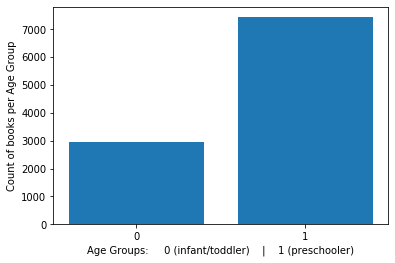

In [20]:
#looking at distribution of books by newly categorized age group
rating, counts = np.unique(kidsbooks['is_preschooler'], return_counts=True)

plt.figure()
plt.bar(["0","1"], counts)
plt.xlabel('Age Groups:     0 (infant/toddler)    |    1 (preschooler)')
plt.ylabel('Count of books per Age Group')
# Function add a legend   
plt.show()

In [21]:
print(counts/np.sum(counts))

[0.28498556 0.71501444]


So I can tell that, by roughly dividing these categories by page count, in this particular dataset there are significantly more preschooler books (listed as class 1) which I've allocated for kids aged 3+. This category of books makes up approximately 70% of the dataset as it has been divided here. Which makes sense as this is the age group where books are more strongly emphasized, there are more years included in this age group, and there are a larger proportion of available books for this age group. 

The infant/toddler books (listed as class 0) and targeted at kids under the age of 3, make up just under 30% of this dataset. I could have reduced the page numbers here to ensure much shorter books for this age group but decided that it is safer to recommend books that are for slightly older kids or are longer books so children can grow into them, rather than risk recommending shorter books to older children who might outgrow them too quickly. 

In [22]:
#saving kidsbooks df as master df with all items 
master = kidsbooks.copy()

#and exporting as CSV for safekeeping
master.to_csv('master.csv', header=True)
master.shape

(10390, 12)

In [23]:
#create a new df with only key columns from the kidsbooks needed for recommender system 
books = kidsbooks[['isbn', 'name', 'description', 'is_preschooler']].copy()

#and exporting as CSV for safekeeping
books.to_csv('books.csv', header=True)
books.shape

(10390, 4)

### Exploratory Data Analysis ###

The text data that I am using is a description for each children's book that's been reviewed and the review score is in the rating column.

In this data set, the rating ranges from 0 to 5. We can look at samples of the data to see some sample descriptions and the book's average review score/rating:

In [24]:
print(kidsbooks[['description', 'rating']].sample(4).values)

[['little monkey is an exceptionally talented pee-er, so he decides to open a peeing circus in order to show off his gift. intended for children, this picture book with illustrations serves as an introduction to boy parts and girl parts - their differences and similarities. it tells readers that girls can do what boys can.'
  3]
 ["a classic nursery rhyme in a unique board book format with applique on the cover and colorful ribbon tags, perfect for little hands!<br /><br />pat-a-cake, pat-a-cake, baker man!<br />bake me a cake as fast as you can.<br /><br />pat it, and roll it, and mark it with a b.<br />put it in the oven for baby and me.<br /><br />babies and toddlers like this classic nursery rhyme, and they'll love touching the soft applique cover of this unique board book that features satin ribbon tags."
  3]
 ['billy is a big boy who can do all sorts of things by himself. and when his parents tell him he is growing bigger every day, he starts to imagine what it would be like to 

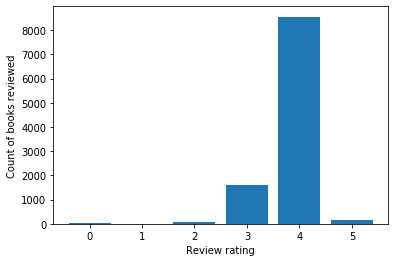

In [25]:
#looking at the distribution of review scores 
rating, counts = np.unique(kidsbooks['rating'], return_counts=True)

plt.figure()
plt.bar(rating, counts)
plt.xlabel('Review rating')
plt.ylabel('Count of books reviewed')
plt.show()

In [26]:
print(counts/np.sum(counts))

[1.34744947e-03 9.62463908e-05 6.15976901e-03 1.53609240e-01
 8.23484119e-01 1.53031761e-02]


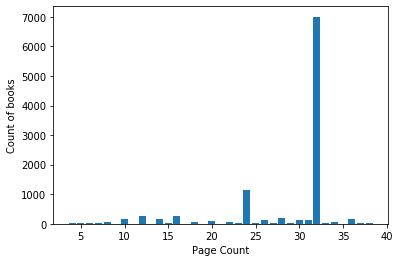

In [27]:
#for interest sake: looking at distribution of number of pages column
values, counts = np.unique(kidsbooks['pagesnumber'], return_counts=True)
plt.figure()
plt.bar(values, counts)
plt.xlabel('Page Count')
plt.ylabel('Count of books')
plt.show()

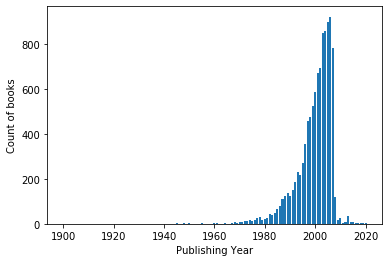

In [28]:
#for interest sake: looking at common publishing dates
values, counts = np.unique(kidsbooks['publishyear'], return_counts=True)
plt.figure()
plt.bar(values, counts)
plt.xlabel('Publishing Year')
plt.ylabel('Count of books')
plt.show()

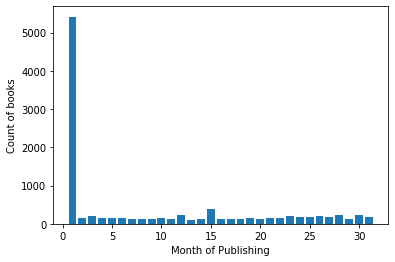

In [29]:
#for interest sake: looking at common publishing month (is there a trend on what month/time of year books get published)
values, counts = np.unique(kidsbooks['publishmonth'], return_counts=True)
plt.figure()
plt.bar(values, counts)
plt.xlabel('Month of Publishing')
plt.ylabel('Count of books')
plt.show()

In [30]:
#checking the values of some of the publish month column
kidsbooks['publishmonth']

0         6
1         1
2         8
3        18
4         1
         ..
17959     1
17962     1
17965    26
17974     1
17985     9
Name: publishmonth, Length: 10390, dtype: int64

Hmm...that's weird. I was hoping to see if there was a pattern on which month of the year many kidsbooks are published but discovered that there are values much higher than 12 in this column. So likely there were some errors in data entry where the day of the month was entered into the month column, which could be why we're seeing values above 12 (Jan-Dec). 

If that is the case, I don't think it's valuable to puruse this train of thought around common dates/frequencies for month and day as they are likely transposed and it would be difficult to tease out the correct data.

So my next course of action is just to begin vectorizing my text data and see if I can draw out more insights around top words used in kids book descriptions, then build my recommender!

**Please see the next notebook named Vectorizing & Modeling for the continuation of this project.** 